<h1 align="center"> <span style="color:darkslategray">ASHRAE</span><h1><h2 span align="center"><span style="color:darkslategray">A Nagy energia előrejelző versenypályázat III</h2><br/><h3 span align="center"><span style="color:darkslategray">Mennyi energiát fogyaszt egy épület?</span></h3>

### <span style="color:indigo"> Bevezetés </span>

Ebben a versenykiírásban a feladat olyan model fejlesztése, mely képes pontosan előrejelezni egy épület energia fogyasztását a követlező területeken: elektromosság, vízhűtés, gőz , illetve melegvíz. Az adatok több mint 1000 épület három évre visszamenő adatait tartalmazzák. 

A kiírás célja, hogy a energiamegtakarítás jobb becslése révén motiválja a nagybefektetőket és pénzügyi intézményeket a területbe történő befektetésre, ezzel előrelendítve a hatékonyság kiépítését. Általánosságban az épületek energiahatékonyságának javítása illeszkedik napjaink egyik legmeghatározóbb agendájába, a klímaváltozás negatív következményei elleni küzdelemhez. Eszerint a fogyasztás visszafogása csökkentheti a környezeti terhelést, azon belül is különösképp az üvegházhatást okozó gázok kibocsátásának a visszafogását. 

Az energiahatékonyság predikciójában rejlő legjelentősebb kihívás a kontrafaktuális állapot becslése, vagyis jelen esetben annak meghatározása, hogy mennyi energiát fogyasztott volna az adott épület abban az esetben, ha az energiafogyasztással kapcsolatos fejlesztések nem kerültek volna kivitelezésre. A gépi tanulás segítségével olyan model fejlesztése a cél, mely három évet felölelő energetikai mérési és időjárás adatok alapján képes pontos becslést adni az energiahatékonyság javulására vonatkozólag. 

### <span style="color:indigo"> Fájlok:</span>

<b>train.csv</b><br/>
<ul>
<li><i>building_id</i> - Idegen kulcs az épület metadata fájlhoz.</li><br/>
<li><i>meter</i> - A mérő azonosító kódja (0: elektromosság (electricity), 1: hűtött víz (chilledwater), 2: gőz (steam), 3: melegvíz (hotwater). Nem minden épület rendelkezik minden mérő típussal.</li><br/>
<li><i>timestamp</i> - az időpont, amikor a mérés megvalósult</li><br/>
<li><i>meter_reading</i> - A célváltozó. Az energiafogyasztás kWh-ban kifejezve (vagy azzal ekvivalens). Valós adatok révén figyelembe kell venni a mérési hibát, mely a modellezési hibának az baseline szintjeként értelmezhető.</li>
</ul>


<b>building_meta.csv</b><br/>
<ul>
<li><i>site_id</i> - Idegen kulcs az időjárás fájlhoz.</li><br/>
<li><i>building_id</i> - Idegen kulcs a training fájlhoz</li><br/>
<li><i>primary_use</i> - Az épület elsődleges tevékenységének kategóriája  az EnergieStar ingatlan típus besorolása alapján</li><br/>
<li><i>square_feet</i> - Az épület bruttó területe</li><br/>
<li><i>year_built</i> - Az épület megynitásának időpontja</li><br/>
<li><i>floor_count</i> - Az épület emeleteinek a száma</li><br/>
</ul>

<b>weather_[train/test].csv</b><br/>
<ul>
<li><i>site_id</i> - Idegen kulcs az időjárás fájlhoz.</li><br/>
<li><i>air_temperature</i> - Hőmérséklet Celsius fokban</li><br/>
<li><i>cloud_coverage</i> - Az arány, amilyen mértékben felhők borítják az eget</li><br/>
<li><i>dew_temperature</i> - Harmatpont Celsius fokban</li><br/>
<li><i>precip_depth_1_hr</i> - Csapadékmennyiség millimeterben</li><br/>
<li><i>sea_level_pressure</i> - Tengerszintre átszámított légnyomás millibárban</li><br/>
<li><i>wind_direction</i> - Szélirány iránytű szerinti fokban</li><br/>
<li><i>wind_speed</i> - Szélerősség m/s-ban</li><br/>
</ul>

<b>test.csv</b><br/>
<ul>
<li><i>row_id</i> - Idegen kulcs az időjárás fájlhoz</li><br/>
<li><i>building_id</i> - Idegen kulcs a training fájlhoz</li><br/>
<li><i>meter</i> - A mérő azonosító kódja (0: elektromosság (electricity), 1: vízhűtés (chilledwater), 2: gőz (steam), 3: melegvíz (hotwater). Nem minden épület rendelkezik minden mérő típussal.</li><br/>
<li><i>timestamp</i> - az időpont, amikor a mérés megvalósult</li>
</ul>


<b>sample_submission.csv</b>

    Az érvényes minta.

### <span style="color:dimgray"> Csomagok importálása</span>

In [1]:
# Csomagok importálása validációhoz
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn import metrics, model_selection

# Csomagok importálása vizualizációhoz
import matplotlib.pyplot as plt
import seaborn as sns

# Csomagok importálása modellezéshez
import xgboost as xgb
#import catboost as cbt
import lightgbm as lgbm

# Általános csomagok importálása
import pandas as pd
import numpy as np
import os
from IPython.display import display_html 

### <span style="color:dimgray"> Adatok betöltése </span>

In [ ]:
# Az elérési út megadása
root = 'C:/Users/ZsoltNagy/Desktop/github_projects/ASHRAE/project_ASHRAE/Data'

In [3]:
# Adatok betöltése
df_train = pd.read_csv(os.path.join(root, 'train.csv'))
df_test = pd.read_csv(os.path.join(root, 'test.csv'))
df_weather_train = pd.read_csv(os.path.join(root, 'weather_train.csv'))
df_weather_test = pd.read_csv(os.path.join(root, 'weather_test.csv'))
df_building = pd.read_csv(os.path.join(root, 'building_metadata.csv'))

In [4]:
# Gyors pillantás az adatokra
display(df_train.iloc[:10,:])
display(df_test.iloc[:10,:])
display(df_weather_train.iloc[:10,:])
display(df_weather_test.iloc[:10,:])
display(df_building.iloc[:10,:])

,building_id,meter,timestamp,meter_reading
0,0,0,2016-01-01 00:00:00,0.0
1,1,0,2016-01-01 00:00:00,0.0
2,2,0,2016-01-01 00:00:00,0.0
3,3,0,2016-01-01 00:00:00,0.0
4,4,0,2016-01-01 00:00:00,0.0
5,5,0,2016-01-01 00:00:00,0.0
6,6,0,2016-01-01 00:00:00,0.0
7,7,0,2016-01-01 00:00:00,0.0
8,8,0,2016-01-01 00:00:00,0.0
9,9,0,2016-01-01 00:00:00,0.0


,row_id,building_id,meter,timestamp
0,0,0,0,2017-01-01 00:00:00
1,1,1,0,2017-01-01 00:00:00
2,2,2,0,2017-01-01 00:00:00
3,3,3,0,2017-01-01 00:00:00
4,4,4,0,2017-01-01 00:00:00
5,5,5,0,2017-01-01 00:00:00
6,6,6,0,2017-01-01 00:00:00
7,7,7,0,2017-01-01 00:00:00
8,8,7,1,2017-01-01 00:00:00
9,9,8,0,2017-01-01 00:00:00


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2016-01-01 00:00:00,25.0,6.0,20.0,NaN,1019.7,0.0,0.0
1,0,2016-01-01 01:00:00,24.4,NaN,21.1,-1.0,1020.2,70.0,1.5
2,0,2016-01-01 02:00:00,22.8,2.0,21.1,0.0,1020.2,0.0,0.0
3,0,2016-01-01 03:00:00,21.1,2.0,20.6,0.0,1020.1,0.0,0.0
4,0,2016-01-01 04:00:00,20.0,2.0,20.0,-1.0,1020.0,250.0,2.6
5,0,2016-01-01 05:00:00,19.4,NaN,19.4,0.0,NaN,0.0,0.0
6,0,2016-01-01 06:00:00,21.1,6.0,21.1,-1.0,1019.4,0.0,0.0
7,0,2016-01-01 07:00:00,21.1,NaN,21.1,0.0,1018.8,210.0,1.5
8,0,2016-01-01 08:00:00,20.6,NaN,20.0,0.0,1018.1,0.0,0.0
9,0,2016-01-01 09:00:00,21.1,NaN,20.6,0.0,1019.0,290.0,1.5


,site_id,timestamp,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,2017-01-01 00:00:00,17.8,4.0,11.7,NaN,1021.4,100.0,3.6
1,0,2017-01-01 01:00:00,17.8,2.0,12.8,0.0,1022.0,130.0,3.1
2,0,2017-01-01 02:00:00,16.1,0.0,12.8,0.0,1021.9,140.0,3.1
3,0,2017-01-01 03:00:00,17.2,0.0,13.3,0.0,1022.2,140.0,3.1
4,0,2017-01-01 04:00:00,16.7,2.0,13.3,0.0,1022.3,130.0,2.6
5,0,2017-01-01 05:00:00,15.6,2.0,12.8,0.0,1022.1,130.0,2.1
6,0,2017-01-01 06:00:00,15.0,0.0,12.8,0.0,1021.7,150.0,1.5
7,0,2017-01-01 07:00:00,15.0,2.0,13.3,0.0,1021.6,0.0,0.0
8,0,2017-01-01 08:00:00,13.3,0.0,12.2,0.0,1021.4,0.0,0.0
9,0,2017-01-01 09:00:00,12.2,4.0,11.7,0.0,1021.4,0.0,0.0


,site_id,building_id,primary_use,square_feet,year_built,floor_count
0,0,0,Education,7432,2008.0,NaN
1,0,1,Education,2720,2004.0,NaN
2,0,2,Education,5376,1991.0,NaN
3,0,3,Education,23685,2002.0,NaN
4,0,4,Education,116607,1975.0,NaN
5,0,5,Education,8000,2000.0,NaN
6,0,6,Lodging/residential,27926,1981.0,NaN
7,0,7,Education,121074,1989.0,NaN
8,0,8,Education,60809,2003.0,NaN
9,0,9,Office,27000,2010.0,NaN


In [5]:
# Alapinformációk lekérése az adatszetekről
df_train.info()
print('')
df_test.info()
print('')
df_weather_train.info()
print('')
df_weather_test.info()
print('')
df_building.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20216100 entries, 0 to 20216099
Data columns (total 4 columns):
building_id      int64
meter            int64
timestamp        object
meter_reading    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 616.9+ MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41697600 entries, 0 to 41697599
Data columns (total 4 columns):
row_id         int64
building_id    int64
meter          int64
timestamp      object
dtypes: int64(3), object(1)
memory usage: 1.2+ GB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139773 entries, 0 to 139772
Data columns (total 9 columns):
site_id               139773 non-null int64
timestamp             139773 non-null object
air_temperature       139718 non-null float64
cloud_coverage        70600 non-null float64
dew_temperature       139660 non-null float64
precip_depth_1_hr     89484 non-null float64
sea_level_pressure    129155 non-null float64
wind_direction        133505 non-null float64
win

### <span style="color:dimgray"> Memóriahasználat csökkentése </span>

#### A train és test adatszetek memóriahasználata jelentős, mely hatékonyan csökkenthető a változók konvertálásával

In [6]:
## Függvény a memóriahasználat csökkentéséhez. Forrás: https://www.kaggle.com/caesarlupum/ashrae-start-here-a-gentle-introduction
def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [7]:
# A memóriahasználatot csökkentő függvény alkalmazása

df_train_red = reduce_mem_usage(df_train)
df_test_red = reduce_mem_usage(df_test)
df_weather_train_red = reduce_mem_usage(df_weather_train)
df_weather_test_red = reduce_mem_usage(df_weather_test)
df_building_red = reduce_mem_usage(df_building)


Mem. usage decreased to 289.19 Mb (53.1% reduction)
Mem. usage decreased to 596.49 Mb (53.1% reduction)
Mem. usage decreased to  3.07 Mb (68.1% reduction)
Mem. usage decreased to  6.08 Mb (68.1% reduction)
Mem. usage decreased to  0.03 Mb (60.3% reduction)


In [9]:
# Alapstatisztikák lekérése az adatok transzformáció előtti és utáni összehasonlításához:

# df_train
desc_dftrain = df_train.describe()
desc_dftrain_red = df_train_red.describe()

desc_dftrain_styler = desc_dftrain.style.set_table_attributes("style='display:inline'").set_caption('Eredeti df_train')
desc_dftrain_red_styler = desc_dftrain_red.style.set_table_attributes("style='display:inline'").set_caption('Transzformált df_train')

display_html(desc_dftrain_styler._repr_html_()+desc_dftrain_red_styler._repr_html_(), raw=True)

# df_test
desc_dftest = df_test.describe()
desc_dftest_red = df_test_red.describe()

desc_dftest_styler = desc_dftest.style.set_table_attributes("style='display:inline'").set_caption('Eredeti df_test')
desc_dftest_red_styler = desc_dftest_red.style.set_table_attributes("style='display:inline'").set_caption('Transzformált df_test')

display_html(desc_dftest_styler._repr_html_()+desc_dftest_red_styler._repr_html_(), raw=True)

# df_weather_train
desc_dfweather_train = df_weather_train.describe()
desc_dfweather_train_red = df_weather_train_red.describe()

desc_dfweather_train_styler = desc_dfweather_train.style.set_table_attributes("style='display:inline'").set_caption('Eredeti df_weather_train')
desc_dfweather_train_red_styler = desc_dfweather_train_red.style.set_table_attributes("style='display:inline'").set_caption('Transzformált df_weather_train')

display_html(desc_dfweather_train_styler._repr_html_()+desc_dfweather_train_red_styler._repr_html_(), raw=True)

# df_weather_test
desc_dfweather_test = df_weather_test.describe()
desc_dfweather_test_red = df_weather_test_red.describe()

desc_dfweather_test_styler = desc_dfweather_test.style.set_table_attributes("style='display:inline'").set_caption('Eredeti df_weather_test')
desc_dfweather_test_red_styler = desc_dfweather_test_red.style.set_table_attributes("style='display:inline'").set_caption('Transzformált df_weather_test')

display_html(desc_dfweather_test_styler._repr_html_()+desc_dfweather_test_red_styler._repr_html_(), raw=True)

# building
desc_dfbuilding = df_building.describe()
desc_dfbuilding_red = df_building_red.describe()

desc_dfbuilding_styler = desc_dfbuilding.style.set_table_attributes("style='display:inline'").set_caption('Eredeti df_building')
desc_dfbuilding_red_styler = desc_dfbuilding_red.style.set_table_attributes("style='display:inline'").set_caption('Transzformált df_building')

display_html(desc_dfbuilding_styler._repr_html_()+desc_dfbuilding_red_styler._repr_html_(), raw=True)


,building_id,meter,meter_reading
count,2.02161e+07,2.02161e+07,2.02161e+07
mean,799.278,0.662441,1988.71
std,426.913,0.930992,153216
min,0,0,0
25%,393,0,18.3
50%,895,0,78.775
75%,1179,1,267.984
max,1448,3,2.19047e+07
,building_id,meter,meter_reading
count,2.02161e+07,2.02161e+07,2.02161e+07


,row_id,building_id,meter
count,4.16976e+07,4.16976e+07,4.16976e+07
mean,2.08488e+07,807.582,0.664286
std,1.20371e+07,429.768,0.927807
min,0,0,0
25%,1.04244e+07,404.75,0
50%,2.08488e+07,900,0
75%,3.12732e+07,1194.25,1
max,4.16976e+07,1448,3
,row_id,building_id,meter
count,4.16976e+07,4.16976e+07,4.16976e+07


,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773,139718,70600,139660,89484,129155,133505,139469
mean,7.47898,nan,nan,nan,nan,nan,nan,nan
std,4.60474,0,0,0,nan,nan,nan,0
min,0,-28.9062,0,-35,-1,968,0,0
25%,3,7.19922,0,0.600098,0,1012,80,2.09961
50%,7,15,2,8.29688,0,1016.5,190,3.09961
75%,11,22.2031,4,14.3984,0,1021,280,5
max,15,47.1875,9,26.0938,343,1046,360,19
,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,139773,139718,70600,139660,89484,129155,133505,139469


,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,277243,277139,136795,276916,181655,255978,264873,276783
mean,7.48465,nan,nan,nan,nan,nan,nan,nan
std,4.61696,0,0,0,nan,nan,nan,0
min,0,-28.0938,0,-31.5938,-1,972,0,0
25%,3,7.19922,0,0.600098,0,1011.5,80,2.09961
50%,7,15,2,8.39844,0,1016.5,190,3.09961
75%,12,22.2031,4,15,0,1021,280,4.60156
max,15,48.3125,9,26.7031,597,1050,360,24.2031
,site_id,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
count,277243,277139,136795,276916,181655,255978,264873,276783


,site_id,building_id,square_feet,year_built,floor_count
count,1449,1449,1449,675,355
mean,6.95238,724,92111.8,inf,3.74023
std,5.00343,418.435,110770,31.0625,3.33398
min,0,0,283,1900,1
25%,3,362,23012,1949,1
50%,5,724,57673,1970,3
75%,13,1086,115676,1995,5
max,15,1448,875000,2017,26
,site_id,building_id,square_feet,year_built,floor_count
count,1449,1449,1449,675,355


### <span style="color:dimgray"> Adatszetek egyesítése </span>

In [14]:
train = df_train_red.merge(df_building_red, on='building_id', how='left')
test = df_test_red.merge(df_building_red, on='building_id', how='left')

train = train.merge(df_weather_train_red, on=['site_id', 'timestamp'], how='left')
test = test.merge(df_weather_test_red, on=['site_id', 'timestamp'], how='left')

display(train.iloc[:10,:])
display(test.iloc[:10,:])

,building_id,meter,timestamp,meter_reading,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,2016-01-01 00:00:00,0.0,0,Education,7432,2008.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
1,1,0,2016-01-01 00:00:00,0.0,0,Education,2720,2004.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
2,2,0,2016-01-01 00:00:00,0.0,0,Education,5376,1991.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
3,3,0,2016-01-01 00:00:00,0.0,0,Education,23685,2002.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
4,4,0,2016-01-01 00:00:00,0.0,0,Education,116607,1975.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
5,5,0,2016-01-01 00:00:00,0.0,0,Education,8000,2000.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
6,6,0,2016-01-01 00:00:00,0.0,0,Lodging/residential,27926,1981.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
7,7,0,2016-01-01 00:00:00,0.0,0,Education,121074,1989.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
8,8,0,2016-01-01 00:00:00,0.0,0,Education,60809,2003.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0
9,9,0,2016-01-01 00:00:00,0.0,0,Office,27000,2010.0,NaN,25.0,6.0,20.0,NaN,1019.5,0.0,0.0


,row_id,building_id,meter,timestamp,site_id,primary_use,square_feet,year_built,floor_count,air_temperature,cloud_coverage,dew_temperature,precip_depth_1_hr,sea_level_pressure,wind_direction,wind_speed
0,0,0,0,2017-01-01 00:00:00,0,Education,7432,2008.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
1,1,1,0,2017-01-01 00:00:00,0,Education,2720,2004.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
2,2,2,0,2017-01-01 00:00:00,0,Education,5376,1991.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
3,3,3,0,2017-01-01 00:00:00,0,Education,23685,2002.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
4,4,4,0,2017-01-01 00:00:00,0,Education,116607,1975.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
5,5,5,0,2017-01-01 00:00:00,0,Education,8000,2000.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
6,6,6,0,2017-01-01 00:00:00,0,Lodging/residential,27926,1981.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
7,7,7,0,2017-01-01 00:00:00,0,Education,121074,1989.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
8,8,7,1,2017-01-01 00:00:00,0,Education,121074,1989.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609
9,9,8,0,2017-01-01 00:00:00,0,Education,60809,2003.0,NaN,17.796875,4.0,11.703125,NaN,1021.5,100.0,3.599609


### <span style="color:dimgray"> Adatok feltérképezése </span>

#### Az adatok feltérképezése egy iteratív, végnélküli folyamat, mely során igyekszünk megérteni az adatban rejlő mintázatokat, összefüggéseket, trendeket, valamint anomáliákat alapvető statistikai eljárások használata révén. 

#### <span style="color:darkmagenta">Hiányzó adatok</span>

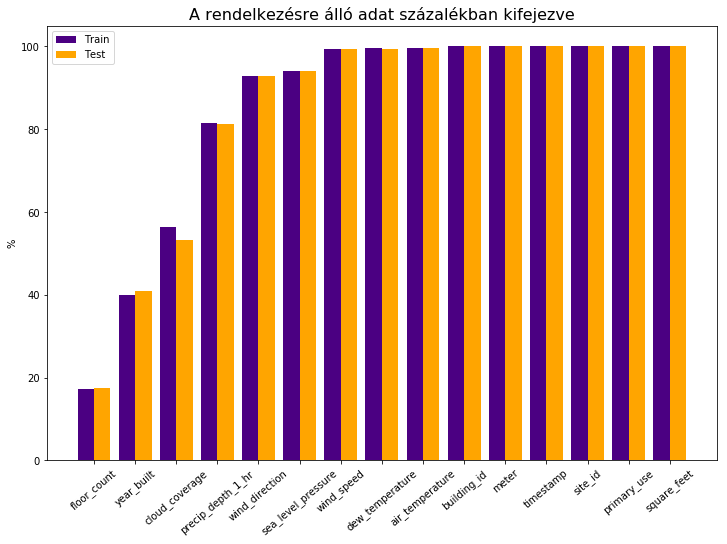

In [47]:
train_missing = train.drop('meter_reading', axis=1).count().divide(len(train)).round(4).sort_values()*100
test_missing = test.drop('row_id', axis=1).count().divide(len(test)).round(4).sort_values()*100


fig, ax = plt.subplots(figsize=(12, 8))
x = np.arange(len(train.drop('meter_reading', axis=1).columns))
bar_width = 0.4
b1 = ax.bar(x, train_missing, width=bar_width, color='indigo')
b2 = ax.bar(x + bar_width, test_missing, width=bar_width, color='orange')

# Fix the x-axes.
ax.set_xticks(x + bar_width / 2)
ax.set_xticklabels(train_missing.index, rotation=40)
ax.legend([b1, b2], ['Train', 'Test'])
ax.set_ylabel('%')
ax.set_title('A rendelkezésre álló adat százalékban kifejezve', fontsize=16);

#### <span style="color:darkmagenta">A célváltozó vizsgálata</span>

Text(0.5, 1.0, 'Adott mérőtípushoz tartozó mérések száma')

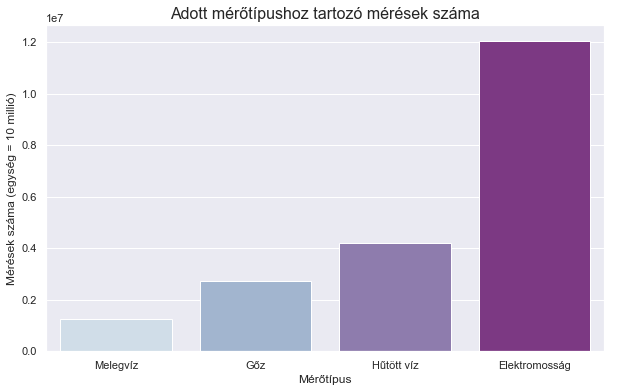

In [99]:
target_count = train['meter'].value_counts()
target_count.index = ['Elektromosság', 'Hűtött víz', 'Gőz', 'Melegvíz']
target_count = target_count.sort_values().to_frame().reset_index()
target_count

ax = sns.barplot(y= "meter", x = "index", data = target_count, palette=("BuPu"))
sns.set(rc={'figure.figsize':(10,6)})
ax.set(xlabel='Mérőtípus', ylabel='Mérések száma (egység = 10 millió)')
ax.set_title('Adott mérőtípushoz tartozó mérések száma', fontsize=16)